# Probability Fundamentals

This notebook covers the basic concepts of probability theory with examples and exercise

## 1. Introduction to Probability

Probability is a measure of the likelihood that an event will occur. It is quantified as a number between 0 and 1, where 0 indicates impossibility and 1 indicates certainty.

### Definitions: 
- **Sample Space (S):** The set of all possible outcomes
- **Event:** A subset of the sample space
- **Probability of an Event A:** P(A) = Number of favorable outcomes / Total number of possible outcomes

In [1]:
# 🎲 Day 9: Probability Fundamentals
# Author: David Caleb Chaparro Orozco
# Topic: Understanding and Applying Basic Probability Concepts in Data Science

# Import necessary libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import bernoulli, binom, norm

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## 2. Basic Probability Examples

### Example 1: Coin Toss
Let's create, load our coin toss data and analyze it.

In [2]:
# Create 'data' folder if it does not exist
os.makedirs("data", exist_ok=True)

# Generate coin_tosses.csv (coin toss simulations)
random.seed(42)
coin_tosses = pd.DataFrame(
    {
        "toss_number": range(1,501),
        "results": [random.choice(["Heads", "Tails"]) for _ in range(500)]
    }
)
coin_tosses.to_csv("data/coin_tosses.csv", index=False)

In [3]:
# Load coin toss data
coin_data = pd.read_csv("data/coin_tosses.csv")
coin_data.head()

,toss_number,results
0,1,Heads
1,2,Heads
2,3,Tails
3,4,Heads
4,5,Heads


In [4]:
# Calculate empirical probability of Heads
total_tosses = len(coin_data)
heads_count = (coin_data['results'] == 'Heads').sum()
p_heads = heads_count / total_tosses

print(f"\nEmpirical Probability of Heads: {p_heads:.4f}")
print(f"Theoretical Probability of Heads: 0.5")


Empirical Probability of Heads: 0.5220
Theoretical Probability of Heads: 0.5


### Example 2: Dice Rolls

In [5]:
# Generate dice_rolls.csv (dice roll simulations)
dice_rolls = pd.DataFrame({
    "roll_number": range(1, 501),
    "results": [random.randint(1, 6) for _ in range(500)]
})
dice_rolls.to_csv("data/dice_rolls.csv", index=False)

In [6]:
# Load dice rolls data
dice_data = pd.read_csv("data/dice_rolls.csv")
dice_data.head()

,roll_number,results
0,1,1
1,2,3
2,3,4
3,4,3
4,5,2


### Example 3: Events 

In [7]:
# Generate events_dataset.csv (generic probability events)
event_types = ["Rain", "Sunny", "Cloudy", "Snow", "Storm"]
events_data = pd.DataFrame({
    "event_id": range(1, 501),
    "event_type": [random.choice(event_types) for _ in range(500)],
    "probability": [round(random.uniform(0, 1), 2) for _ in range(500)]
})
events_data.to_csv("data/events_dataset.csv", index=False)

In [8]:
# Load events data
events_data = pd.read_csv("data/events_dataset.csv")
events_data.head()

,event_id,event_type,probability
0,1,Cloudy,0.46
1,2,Storm,0.04
2,3,Snow,0.37
3,4,Rain,0.29
4,5,Cloudy,0.64


### Exercise 1:
Calculate the probability of getting exactly two heads in three consecutive tosses using the data.

In [9]:
# Count the number of times exactly two heads appear in three consecutive tosses
count_exact_two_heads = 0
total_sequences = 0

# Loop through the dataset in sequences of 3 consecutive tosses
for i in range(len(coin_tosses) - 2):
    sequence = coin_tosses["results"].iloc[i:i+3].tolist()
    if sequence.count("Heads") == 2:
        count_exact_two_heads += 1
    total_sequences += 1

# Calculate probability
probability = count_exact_two_heads / total_sequences
print(f"The probability of get exactly two head is: {probability}")

The probability of get exactly two head is: 0.39959839357429716


## 3. Probability Rules

### 3.1 Complement Rule

$$
P(A') = 1 - P(A)
$$

This rule tells us that the probability of not having event A happen is simply 1 minus the probability of A happening.

Example:
Let A = event of getting "Heads" in a coin toss.

In [10]:
# Probability of getting Heads
p_heads = (coin_tosses["results"] == "Heads").mean()
# Complement: Probability of NOT getting Heads (i.e., getting Tails)
p_not_heads = 1 - p_heads

print("Complement Rule:")
print(f"P(Heads) = {p_heads:.3f}")
print(f"P(Not Heads) = {p_not_heads:.3f}\n")

Complement Rule:
P(Heads) = 0.522
P(Not Heads) = 0.478



### 3.2 Addition Rule
$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

This gives the probability that **A or B** happens (or both). We subtract $P(A \cap B)$ because otherwise we’d be double-counting cases where both events happen.

Example:
Let **A** = event of getting "Heads" in the coin toss,
and **B** = event of rolling a "6" in the dice roll.

In [11]:
# Event A: Heads in coin toss
p_a = p_heads
# Event B: Rolling a 6
p_b = (dice_rolls["results"] == 6).mean()
# Intersection: Heads AND rolling a 6 (same index)
p_a_and_b = ((coin_tosses["results"] == "Heads") & (dice_rolls["results"] == 6)).mean()
# Union: P(A or B)
p_a_or_b = p_a + p_b - p_a_and_b

print("Addition Rule:")
print(f"P(A) = {p_a:.3f}, P(B) = {p_b:.3f}, P(A ∩ B) = {p_a_and_b:.3f}")
print(f"P(A ∪ B) = {p_a_or_b:.3f}\n")

Addition Rule:
P(A) = 0.522, P(B) = 0.158, P(A ∩ B) = 0.092
P(A ∪ B) = 0.588



### 3.3 Conditional Probability
$$
P(A|B) = \frac{P(A \cap B)}{P(B)}
$$

This is the probability of **A happening given that B has already happened**.

Example:
Let **A** = "Heads" in a coin toss,
and **B** = "6" in dice roll,
based on rows with the same index in both datasets.

In [12]:
p_a_given_b = p_a_and_b / p_b

print("Conditional Probability:")
print(f"P(Heads | Roll = 6) = {p_a_given_b:.3f}")

Conditional Probability:
P(Heads | Roll = 6) = 0.582


### Example 2: Dice Rolls
Let's work with dice roll data to understand these rules.

In [13]:
# Calculate probabilities
total_rolls = len(dice_data)
p_4 = (dice_data['results'] == 4).sum() / total_rolls
p_even = dice_data['results'].apply(lambda x: x % 2 == 0).sum() / total_rolls
p_4_and_even = ((dice_data['results'] == 4) & 
                dice_data['results'].apply(lambda x: x % 2 == 0)).sum() / total_rolls

print(f"\nP(4): {p_4:.4f}")
print(f"P(Even): {p_even:.4f}")
print(f"P(4 and Even): {p_4_and_even:.4f}")

# Conditional probability: P(4|Even)
p_4_given_even = p_4_and_even / p_even
print(f"\nP(4|Even): {p_4_given_even:.4f}")


P(4): 0.1940
P(Even): 0.5000
P(4 and Even): 0.1940

P(4|Even): 0.3880


### Exercise 2:
Using the dice, calculate:
1. The probability of rolling a number greater than 4
2. The probability of rolling an odd number given that it's greater than 4

In [14]:
# Define events for the exercise
# A: roll > 4  (i.e., 5 or 6)
# B: roll is odd (1,3,5)

A = dice_rolls["results"] > 4
B = dice_rolls["results"] % 2 == 1

In [15]:
# 1) Probability of rolling a number greater than 4: P(A)
print("1) Probability of rolling a number greater than 4 (i.e., 5 or 6):")
p_A = A.mean()
print(f"P(A) = {p_A:.4f}  ({int(p_A * len(dice_rolls))} out of {len(dice_rolls)})\n")

1) Probability of rolling a number greater than 4 (i.e., 5 or 6):
P(A) = 0.3220  (161 out of 500)



In [16]:
# 2) Probability of rolling an odd number given that it's greater than 4: P(B|A)
# P(B|A) = P(A ∩ B) / P(A)
print("2) Probability of rolling an odd number given that it's greater than 4:")
p_A_and_B = (A & B).mean()
p_B_given_A = p_A_and_B / p_A if p_A > 0 else float('nan')

print("That is, P(odd | roll > 4) = P(roll is odd AND roll > 4) / P(roll > 4)")
print(f"P(B|A) = {p_B_given_A:.4f}\n")

2) Probability of rolling an odd number given that it's greater than 4:
That is, P(odd | roll > 4) = P(roll is odd AND roll > 4) / P(roll > 4)
P(B|A) = 0.5093



## 4. Independence and Bayes' Theorem

### 4.1 Independent Events
Two events A and B are independent if P(A ∩ B) = P(A) × P(B)

In [17]:
# Independence check
p_B = B.mean()
independent = abs(p_A_and_B - (p_A * p_B)) < 1e-12 # numerical tolerance

print("Independence check between A (roll > 4) and B (odd roll):")
print(f"P(A) * P(B) = {p_A * p_B:.6f}")
print(f"P(A ∩ B) = {p_A_and_B:.6f}")
print("Are they independent? ->", independent, "\n")

Independence check between A (roll > 4) and B (odd roll):
P(A) * P(B) = 0.161000
P(A ∩ B) = 0.164000
Are they independent? -> False 



### 4.2 Bayes' Theorem
$$
P(A|B) = P(B|A) × \frac{P(A)}{P(B)}
$$

In [18]:
# Bayes' Theorem demonstration
# Choose to compute P(A|B) using Bayes: P(A|B) = P(B|A)*P(A) / P(B)
p_B_given_A = p_A_and_B / p_A if p_A > 0 else float('nan')
p_A_given_B_bayes = (p_B_given_A * p_A) / p_B if p_B > 0 else float('nan')

# Also compute P(A|B) directly for verification
p_A_given_B_direct = p_A_and_B / p_B if p_B > 0 else float('nan')

print("Bayes' Theorem demonstration: compute P(A|B) via Bayes' formula")
print("P(A|B) = P(B|A) * P(A) / P(B)")
print(f"P(A|B) via Bayes = {p_A_given_B_bayes:.4f}")
print(f"P(A|B) direct    = {p_A_given_B_direct:.4f} (verified)\n")

Bayes' Theorem demonstration: compute P(A|B) via Bayes' formula
P(A|B) = P(B|A) * P(A) / P(B)
P(A|B) via Bayes = 0.3280
P(A|B) direct    = 0.3280 (verified)



In [19]:
# Also show counts for clarity
counts = pd.DataFrame({
    "value": range(1,7),
    "count": dice_rolls["results"].value_counts().sort_index().values
})

print("Counts by face value:")
print(counts.to_string(index=False))

Counts by face value:
 value  count
     1     79
     2     74
     3     89
     4     97
     5     82
     6     79


### Example 3: Events Dataset
Let's analyze more complex events.

In [20]:
# Define events based on event_type
A = events_data['event_type'] == "Rain"
B = events_data['event_type'] == "Sunny"
C = events_data['event_type'] == "Snow"

In [21]:
# Independence check between A and B
p_a = A.mean()
p_b = B.mean()
# This will be zero since event_type can't be Rain and Sunny at same time
p_a_and_b = (A & B).mean()  

In [22]:
print("Independence Check — Rain & Sunny")
print(f"P(A = Rain): {p_a:.4f}")
print(f"P(B = Sunny): {p_b:.4f}")
print(f"P(A and B): {p_a_and_b:.4f}")
print(f"P(A) × P(B): {p_a * p_b:.4f}")

Independence Check — Rain & Sunny
P(A = Rain): 0.2100
P(B = Sunny): 0.1780
P(A and B): 0.0000
P(A) × P(B): 0.0374


In [23]:
if abs(p_a_and_b - (p_a * p_b)) < 0.01:
    print("'Rain' and 'Sunny' appear independent (note: mutually exclusive events will break this test).")
else:
    print("'Rain' and 'Sunny' appear dependent.")

'Rain' and 'Sunny' appear dependent.


In [24]:
# Bayes' Theorem for A and B
# Here P(B|A) is zero since they are mutually exclusive, so P(A|B) will also be zero
p_b_given_a = (A & B).sum() / A.sum() if A.sum() > 0 else 0
p_a_given_b = p_b_given_a * p_a / p_b if p_b > 0 else 0

In [25]:
print("\nBayes' Theorem — Rain & Sunny")
print(f"P(A|B) using Bayes: {p_a_given_b:.4f}")
print(f"P(A|B) direct: {(A & B).sum() / B.sum() if B.sum() > 0 else 0:.4f}")


Bayes' Theorem — Rain & Sunny
P(A|B) using Bayes: 0.0000
P(A|B) direct: 0.0000


In [26]:
# Exercise 3
# 1. P(A | not B) = Probability of Rain given not Sunny
not_B = ~B
p_a_and_not_b = (A & not_B).sum()
p_a_given_not_b = p_a_and_not_b / not_B.sum()

print(f"\nExercise 3.1 \nP(Rain | not Sunny): {p_a_given_not_b:.4f}")


Exercise 3.1 
P(Rain | not Sunny): 0.2555


In [27]:
# Independence check between A (Rain) and C (Snow)
p_c = C.mean()
p_a_and_c = (A & C).mean()

print("\nExercise 3.2 \nIndependence Check Rain & Snow")
print(f"P(A = Rain): {p_a:.4f}")
print(f"P(C = Snow): {p_c:.4f}")
print(f"P(A ∩ C): {p_a_and_c:.4f}")
print(f"P(A) × P(C): {p_a * p_c:.4f}")

if abs(p_a_and_c - (p_a * p_c)) < 0.01:
    print("'Rain' and 'Snow' appear independent (but likely mutually exclusive).")
else:
    print("'Rain' and 'Snow' appear dependent.")


Exercise 3.2 
Independence Check Rain & Snow
P(A = Rain): 0.2100
P(C = Snow): 0.2020
P(A ∩ C): 0.0000
P(A) × P(C): 0.0424
'Rain' and 'Snow' appear dependent.


## 5. Random Variables and Distributions

### 5.1 Discrete Random Variables

* **PMF**: The probability that $X$ takes a specific value $x$. For a die, PMF is the fraction of times each face appears.
* **Expected Value**:

  $$
  E[X] = \sum_{x} x \cdot P(X = x)
  $$

    It’s the “long-run average” if we roll the die many times.
* **Variance**:

  $$
  \mathrm{Var}(X) = E[X^2] - (E[X])^2
  $$

  Measures how spread out the values are.

In [28]:
X = dice_data["results"]

# PMF: P(X = x) = frequency of each outcome / total rolls
pmf = X.value_counts(normalize=True).sort_index()

# Expected Value E[X] = Σ x × P(X = x)
E_X = sum(x * p for x, p in pmf.items())

# Variance Var(X) = E[X²] - (E[X])²
E_X2 = sum((x**2) * p for x, p in pmf.items())
Var_X = E_X2 - E_X**2

print("Discrete Random Variable: Dice Roll")
print("PMF:")
print(pmf)
print(f"\nExpected Value E[X] = {E_X:.4f}")
print(f"Variance Var(X) = {Var_X:.4f}\n")

Discrete Random Variable: Dice Roll
PMF:
results
1    0.158
2    0.148
3    0.178
4    0.194
5    0.164
6    0.158
Name: proportion, dtype: float64

Expected Value E[X] = 3.5320
Variance Var(X) = 2.7690



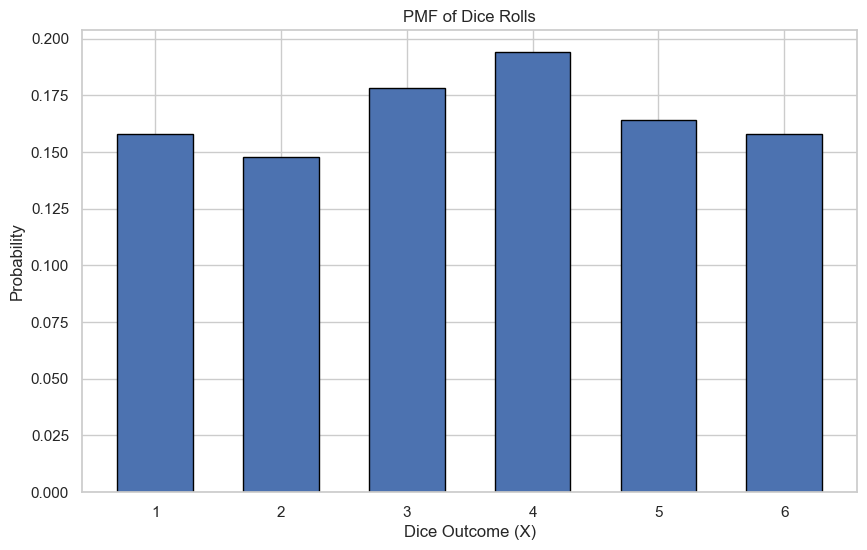

<Figure size 1000x600 with 0 Axes>

In [29]:
# Plot PMF
plt.bar(pmf.index, pmf.values, width=0.6, edgecolor='black')
plt.xlabel("Dice Outcome (X)")
plt.ylabel("Probability")
plt.title("PMF of Dice Rolls")
plt.show()
plt.savefig("outputs/PMFofDiceRolls")

### 5.2 Continuous Random Variables

* **PDF**: Describes the relative likelihood of a continuous variable taking on a value in a small interval.
* **CDF**:

  $$
  F(x) = P(X \le x)
  $$

  Gives cumulative probability up to $x$.
* For continuous variables, probabilities are areas under the PDF curve (not single points).

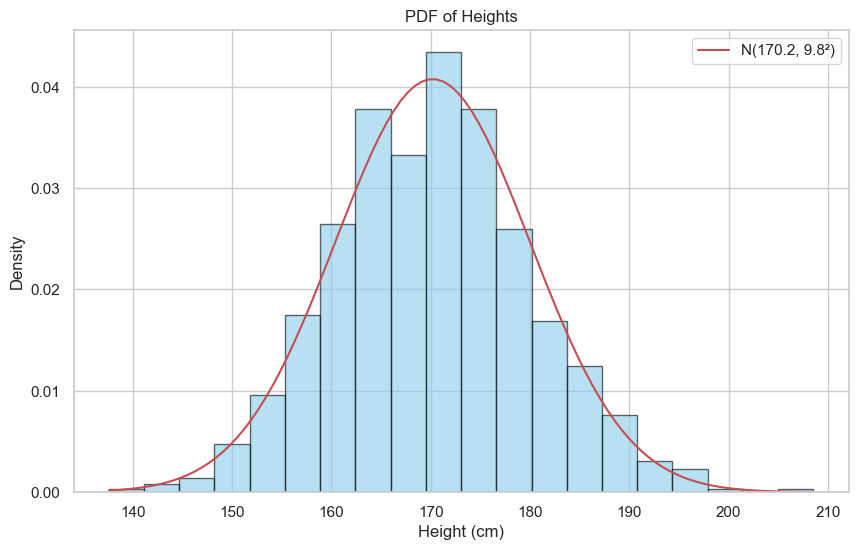

Continuous Random Variable: Height
Mean = 170.19, Std Dev = 9.79
P(Height ≤ 175) ≈ 0.6883 (from Normal CDF)


<Figure size 1000x600 with 0 Axes>

In [30]:
# Example: Heights (simulated) ~ Normal(μ=170, σ=10)
np.random.seed(42)
heights = np.random.normal(loc=170, scale=10, size=1000)

# Estimate PDF using histogram (normalized to sum to 1)
count, bins, ignored = plt.hist(heights, bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Theoretical Normal PDF for comparison
mu, sigma = np.mean(heights), np.std(heights)
x = np.linspace(min(heights), max(heights), 100)
pdf = norm.pdf(x, mu, sigma)

# Plot PDF
plt.plot(x, pdf, 'r-', label=f'N({mu:.1f}, {sigma:.1f}²)')
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.title("PDF of Heights")
plt.legend()
plt.show()
plt.savefig("outputs/PDFofHeights")

# CDF: cumulative probability up to a given value
cdf_value = norm.cdf(175, mu, sigma)
print("Continuous Random Variable: Height")
print(f"Mean = {mu:.2f}, Std Dev = {sigma:.2f}")
print(f"P(Height ≤ 175) ≈ {cdf_value:.4f} (from Normal CDF)")

### Example 4: Analyzing Dice Rolls as Random Variable
Let's treat dice rolls as a random variable X.

In [31]:
# Calculate expected value and variance
expected_value = (dice_data['results'] * pmf[dice_data['results']]).sum()
expected_value_sq = (dice_data['results']**2 * pmf[dice_data['results']]).sum()
variance = expected_value_sq - expected_value**2

print(f"Expected Value: {expected_value:.4f}")
print(f"Variance: {variance:.4f}")

Expected Value: 257.6540
Variance: -65552.6577


### Exercise 4:
For the dice rolls:
1. Calculate the expected value of Y = X + 2 (where X is the dice result)
2. Calculate the variance of Y

In [32]:
# X = dice result
X = dice_data['results']

In [33]:
# 1) Expected value of Y = X + 2
E_X = X.mean()
# linearity of expectation
E_Y = E_X + 2  

In [34]:
# 2) Variance of Y
# population variance (E[X^2] - E[X]^2)
Var_X = X.var(ddof=0)  
# adding constant doesn't change variance
Var_Y = Var_X  

print("Sample-based results (from data/dice_rolls.csv):")
print(f"E[X] = {E_X:.4f}")
print(f"E[Y] = E[X] + 2 = {E_Y:.4f}")
print(f"Var(X) = {Var_X:.4f}")
print(f"Var(Y) = Var(X) = {Var_Y:.4f}\n")

Sample-based results (from data/dice_rolls.csv):
E[X] = 3.5320
E[Y] = E[X] + 2 = 5.5320
Var(X) = 2.7690
Var(Y) = Var(X) = 2.7690



In [35]:
# Also show theoretical values for a fair 6-sided die
theoretical_E_X = sum(i * (1/6) for i in range(1,7))
theoretical_Var_X = sum((i**2) * (1/6) for i in range(1,7)) - theoretical_E_X**2
theoretical_E_Y = theoretical_E_X + 2
theoretical_Var_Y = theoretical_Var_X

print("Theoretical results for a fair 6-sided die:")
print(f"E[X] (theoretical) = {theoretical_E_X:.4f}")
print(f"E[Y] (theoretical) = {theoretical_E_Y:.4f}")
print(f"Var(X) (theoretical) = {theoretical_Var_X:.4f}")
print(f"Var(Y) (theoretical) = {theoretical_Var_Y:.4f}\n")

Theoretical results for a fair 6-sided die:
E[X] (theoretical) = 3.5000
E[Y] (theoretical) = 5.5000
Var(X) (theoretical) = 2.9167
Var(Y) (theoretical) = 2.9167



In [36]:
# Show PMF (empirical) for clarity
pmf = X.value_counts(normalize=True).sort_index()
print("Empirical PMF (relative frequencies):")
print(pmf.to_string())

Empirical PMF (relative frequencies):
results
1    0.158
2    0.148
3    0.178
4    0.194
5    0.164
6    0.158


## 6. Common Probability Distributions

#### **6.1 Bernoulli Distribution**
* Models a single trial with two possible outcomes: success (1) or failure (0).
* **PMF**:

  $$
  P(X=1) = p, \quad P(X=0) = 1-p
  $$
* Example: tossing a biased coin.




Bernoulli Distribution
P(X=0) = 0.40, P(X=1) = 0.60


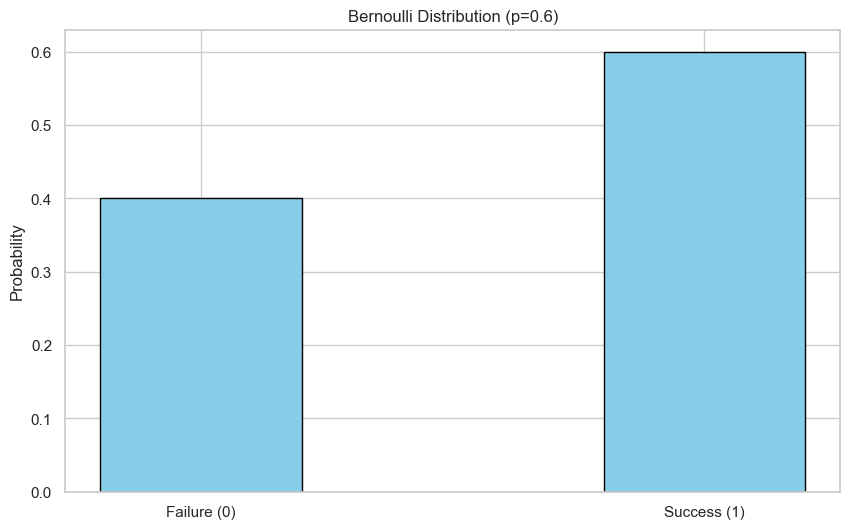

<Figure size 1000x600 with 0 Axes>

In [37]:
# probability of success (e.g., head in a coin toss)
p = 0.6  
# 0 = failure, 1 = success
x = [0, 1]  
pmf_bernoulli = bernoulli.pmf(x, p)

print("\nBernoulli Distribution")
print(f"P(X=0) = {pmf_bernoulli[0]:.2f}, P(X=1) = {pmf_bernoulli[1]:.2f}")

plt.bar(x, pmf_bernoulli, width=0.4, color='skyblue', edgecolor='black')
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.ylabel("Probability")
plt.title(f"Bernoulli Distribution (p={p})")
plt.show()
plt.savefig("outputs/BernoulliDistribution")

#### **6.2 Binomial Distribution**

* Models the number of successes in $n$ independent Bernoulli trials.
* **PMF**:

  $$
  P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}
  $$
* Example: number of heads in 10 coin tosses.


Binomial Distribution 
Sum of probabilities = 1.00 (should be 1)


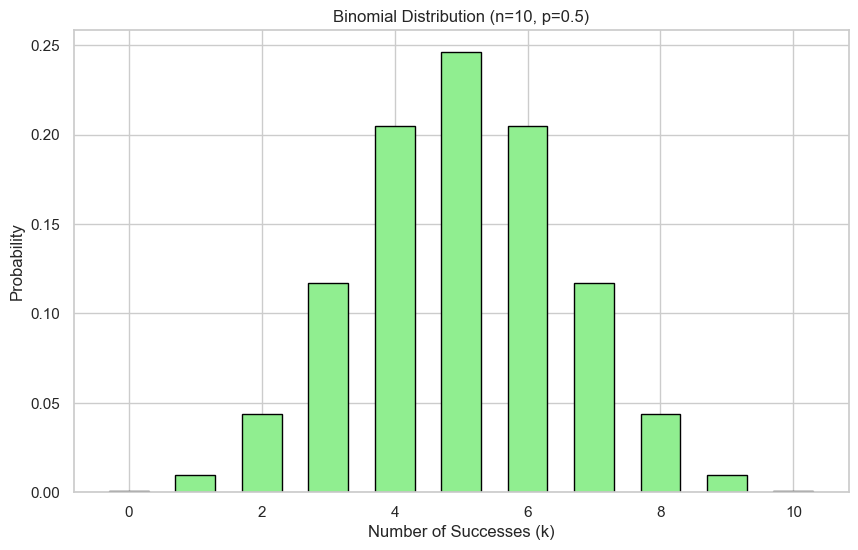

<Figure size 1000x600 with 0 Axes>

In [38]:
# number of trials
n = 10  
# probability of success in each trial
p = 0.5  
k_values = np.arange(0, n+1)
pmf_binomial = binom.pmf(k_values, n, p)

print("\nBinomial Distribution ")
print(f"Sum of probabilities = {pmf_binomial.sum():.2f} (should be 1)")

plt.bar(k_values, pmf_binomial, width=0.6, color='lightgreen', edgecolor='black')
plt.xlabel("Number of Successes (k)")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()
plt.savefig("outputs/BinomialDistribution")

#### **6.3 Normal Distribution**

* Continuous distribution defined by mean $\mu$ and standard deviation $\sigma$.
* Symmetrical, bell-shaped curve; used to model many natural phenomena.
* **PDF**: gives the relative likelihood for each value, area under curve = 1.
* Example: human heights.


Normal Distribution
Mean = 170, Std Dev = 10


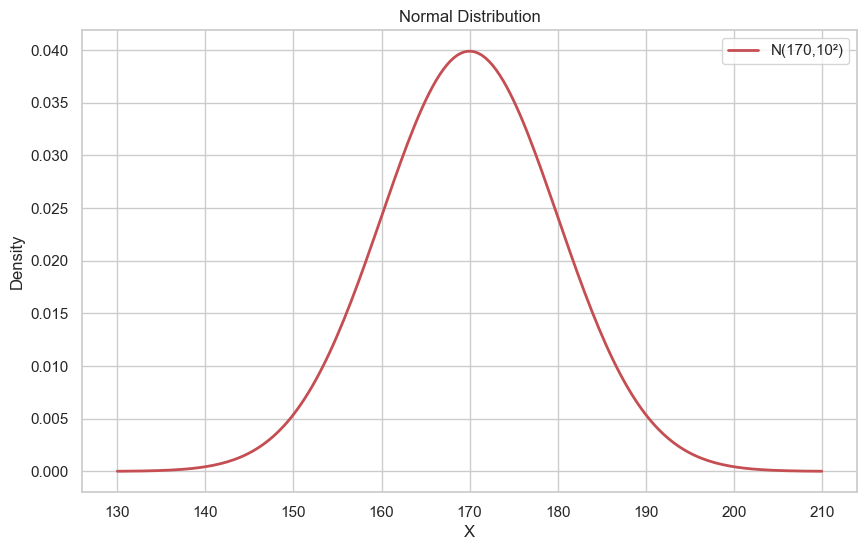

<Figure size 1000x600 with 0 Axes>

In [39]:
# mean and standard deviation (e.g., human heights)
mu, sigma = 170, 10  
x_vals = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)
pdf_normal = norm.pdf(x_vals, mu, sigma)

print("\nNormal Distribution")
print(f"Mean = {mu}, Std Dev = {sigma}")

plt.plot(x_vals, pdf_normal, 'r-', lw=2, label=f'N({mu},{sigma}²)')
plt.xlabel("X")
plt.ylabel("Density")
plt.title("Normal Distribution")
plt.legend()
plt.show()
plt.savefig("outputs/NormalDistribution")

### Example 5: Coin Tosses as Binomial
Let's analyze sequences of coin tosses.

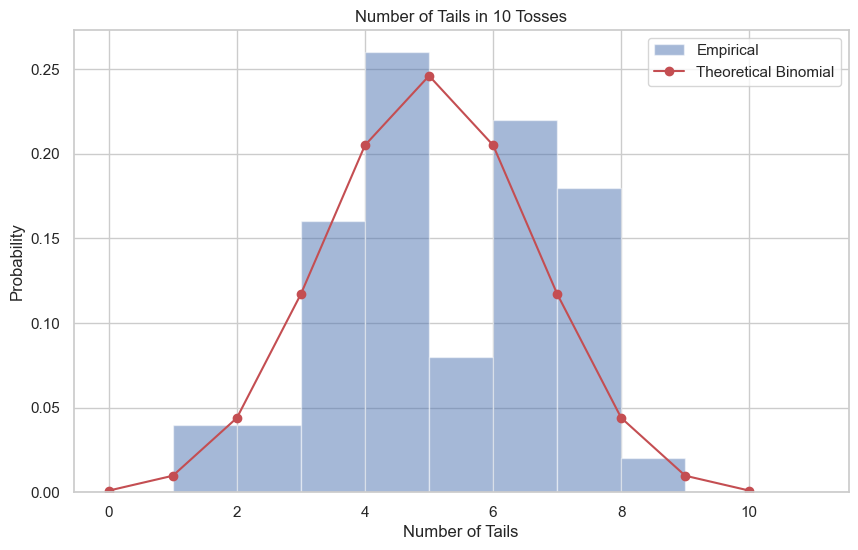

<Figure size 1000x600 with 0 Axes>

In [40]:
# Count number of heads in each sequence of 10 tosses
coin_sequences = coin_data.groupby(coin_data.index // 10)['results'].apply(lambda x: (x == 'Tails').sum())

# Binomial parameters

# trials per sequence
n = 10  
# theoretical probability
p = 0.5  

# Plot theoretical vs empirical
plt.hist(coin_sequences, bins=range(12), density=True, alpha=0.5, label='Empirical')
x = np.arange(0, 11)
plt.plot(x, binom.pmf(x, n, p), 'ro-', label='Theoretical Binomial')
plt.title('Number of Tails in 10 Tosses')
plt.xlabel('Number of Tails')
plt.ylabel('Probability')
plt.legend()
plt.show()
plt.savefig("outputs/NumberofTailsTheoricalvsEmpirical")

### Exercise 5:
1. Calculate the probability of getting exactly 7 heads in 10 tosses using the binomial formula
2. Calculate the probability of getting 7 or more heads in 10 tosses

In [41]:
from math import comb
# Parameters

# number of tosses
n = 10      
# probability of head
p = 0.5     
# number of heads
k = 7       

# 1) Probability of exactly k heads
p_exactly_k = comb(n, k) * (p**k) * ((1-p)**(n-k))
print(f"P(X = {k}) = {p_exactly_k:.6f}")

P(X = 7) = 0.117188


# The **binomial formula**:

$$
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}
$$

In [42]:
# 2) Probability of k or more heads
p_k_or_more = sum(comb(n, i) * (p**i) * ((1-p)**(n-i)) for i in range(k, n+1))
print(f"P(X ≥ {k}) = {p_k_or_more:.6f}")

P(X ≥ 7) = 0.171875


## 7. Central Limit Theorem

The Central Limit Theorem states that the sampling distribution of the mean of any independent, random variable will be normal or nearly normal, if the sample size is large enough.

### Example 6: Demonstrating CLT with Dice Rolls
Let's show how sample means approach normal distribution.

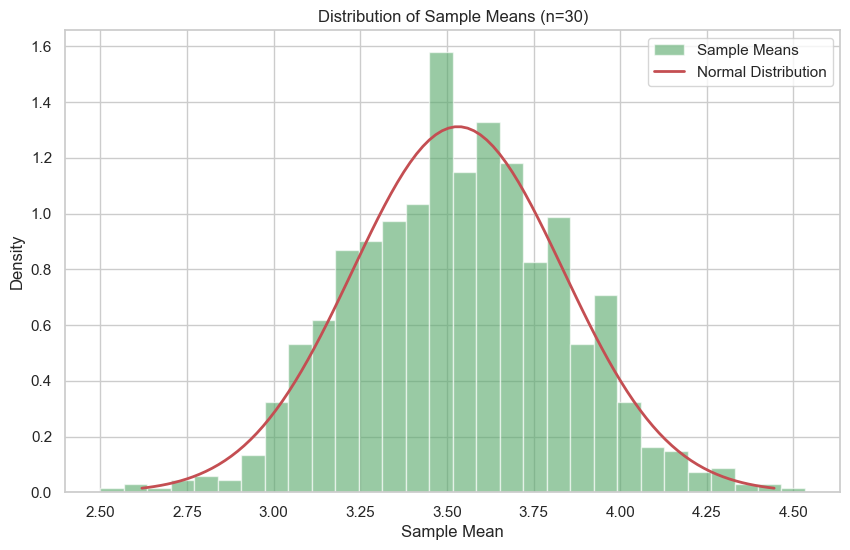

<Figure size 1000x600 with 0 Axes>

In [43]:
# Generate sample means
sample_means = [dice_data['results'].sample(30, replace=True).mean() for _ in range(1000)]

# Plot histogram
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g', label='Sample Means')

# Plot normal distribution
mu, sigma = dice_data['results'].mean(), dice_data['results'].std()/np.sqrt(30)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal Distribution')

plt.title('Distribution of Sample Means (n=30)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.savefig("outputs/DistributionofSampleMeans")

### Exercise 6:
Repeat the CLT demonstration with:
1. Sample size of 10 instead of 30
2. Sample size of 100

Compare the results.

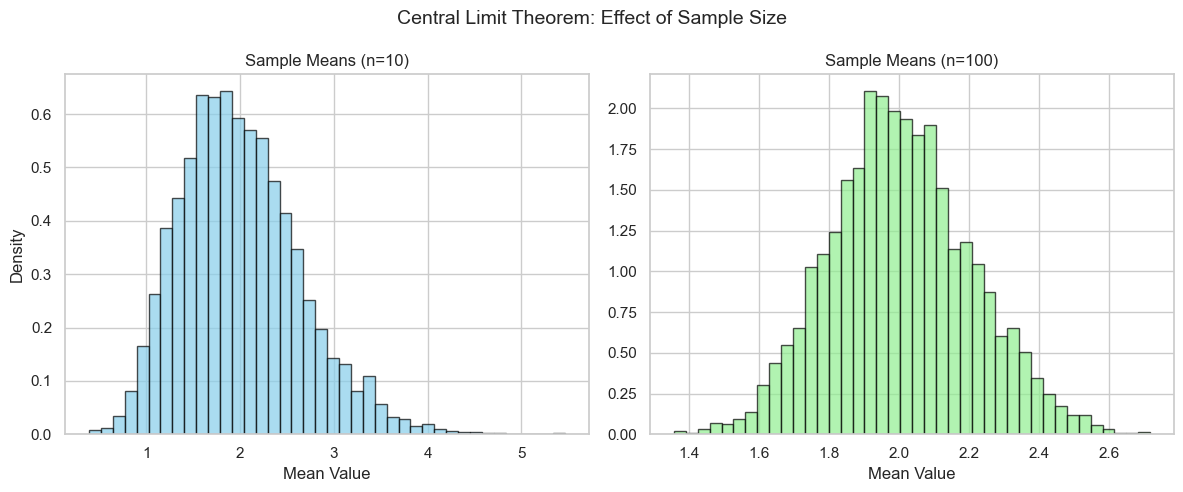

Summary Statistics:
Population Mean: 2.0022
Sample Means (n=10) Mean: 1.9996, Std: 0.6385
Sample Means (n=100) Mean: 2.0049, Std: 0.2014


In [44]:
# Simulate a non-normal population distribution
# Example: exponential distribution (skewed)
np.random.seed(42)
population = np.random.exponential(scale=2, size=1_000_000)

# Function to sample means
def sample_means(population, sample_size, num_samples=5000):
    means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]
    return np.array(means)

# Sample sizes for comparison
sample_size_10 = sample_means(population, 10)
sample_size_100 = sample_means(population, 100)

# Plot results
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(sample_size_10, bins=40, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Sample Means (n=10)")
plt.xlabel("Mean Value")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
plt.hist(sample_size_100, bins=40, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title("Sample Means (n=100)")
plt.xlabel("Mean Value")

plt.suptitle("Central Limit Theorem: Effect of Sample Size", fontsize=14)
plt.tight_layout()
plt.show()

# Summary statistics
print("Summary Statistics:")
print(f"Population Mean: {np.mean(population):.4f}")
print(f"Sample Means (n=10) Mean: {np.mean(sample_size_10):.4f}, Std: {np.std(sample_size_10):.4f}")
print(f"Sample Means (n=100) Mean: {np.mean(sample_size_100):.4f}, Std: {np.std(sample_size_100):.4f}")

---
# Testing probability_utils.py
---

In [46]:
from probability_utils import *

coin_tosses = generate_coin_tosses(500, seed=42)
p_heads = empirical_probability(coin_tosses['results'] == 'Heads')
print(p_heads)
p_not_heads = complement_rule(p_heads)
print(p_not_heads)

0.522
0.478
